In [3]:
# Development of an ETL pipeline using pandas

import pandas as pd     #for Dataframe + transformation

In [4]:
from IPython.display import Image
  
# get the image
Image(url="https://i1.wp.com/www.timmitchell.net/wp-content/uploads/2017/01/etlpipeline.png?resize=590%2C336&ssl=1", width=500, height=400)

In [5]:
import mysql.connector

'''Programming languages like Python need a special driver before they can connect to a database
MySQL Connector/Python enables Python programs to access MySQL databases, using an API
dat is compliant wif the Python Database API. It is written in pure Python.
This module does not come built-in with Python. To install it type the below command in the terminal.

pip install mysql-connector-python'''

'Programming languages like Python need a special driver before they can connect to a database\nMySQL Connector/Python enables Python programs to access MySQL databases, using an API\ndat is compliant wif the Python Database API. It is written in pure Python.\nThis module does not come built-in with Python. To install it type the below command in the terminal.\n\npip install mysql-connector-python'

In [6]:
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="abhayjr11"
)

print(mydb)

### Extract

In [7]:
# Read Data from CSV file(source)
data = pd.read_csv('C:\\work\\ETL\\books.csv')

In [8]:
# show the metadata (info about dataset)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         700 non-null    object 
 1   Author       700 non-null    object 
 2   User Rating  700 non-null    float64
 3   Reviews      700 non-null    int64  
 4   Price        700 non-null    int64  
 5   Year         700 non-null    int64  
 6   Genre        700 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 38.4+ KB


In [9]:
# analysis the data 
data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,Act Like a Lady. Think Like a Man: What Men Re...,Steve Harvey,4.6,5013,17,2009,Non Fiction
1,Arguing with Idiots: How to Stop Small Minds a...,Glenn Beck,4.6,798,5,2009,Non Fiction
2,Breaking Dawn (The Twilight Saga. Book 4),Stephenie Meyer,4.6,9769,13,2009,Fiction
3,Crazy Love: Overwhelmed by a Relentless God,Francis Chan,4.7,1542,14,2009,Non Fiction
4,Dead And Gone: A Sookie Stackhouse Novel (Sook...,Charlaine Harris,4.6,1541,4,2009,Fiction


### transform 

In [11]:
# find the null fields
data.isnull().sum()

# output must be zero for all fields then only we can proceed to insert the data into database if not cleaning must be done
# if there is/are null value then we can remove it or can give random value(max average value given)

''' all the values the non zero data is healty and clean'''

' all the values the non zero data is healty and clean'

In [12]:
# Drop duplicates records
data.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,Act Like a Lady. Think Like a Man: What Men Re...,Steve Harvey,4.6,5013,17,2009,Non Fiction
1,Arguing with Idiots: How to Stop Small Minds a...,Glenn Beck,4.6,798,5,2009,Non Fiction
2,Breaking Dawn (The Twilight Saga. Book 4),Stephenie Meyer,4.6,9769,13,2009,Fiction
3,Crazy Love: Overwhelmed by a Relentless God,Francis Chan,4.7,1542,14,2009,Non Fiction
4,Dead And Gone: A Sookie Stackhouse Novel (Sook...,Charlaine Harris,4.6,1541,4,2009,Fiction
...,...,...,...,...,...,...,...
695,The Wonderful Things You Will Be,Emily Winfield Martin,4.9,20920,9,2022,Fiction
696,Ugly Love: A Novel,Colleen Hoover,4.7,33929,10,2022,Fiction
697,Verity,Colleen Hoover,4.6,71826,11,2022,Fiction
698,What to Expect When You're Expecting,Heidi Murkoff,4.8,27052,13,2022,Non Fiction


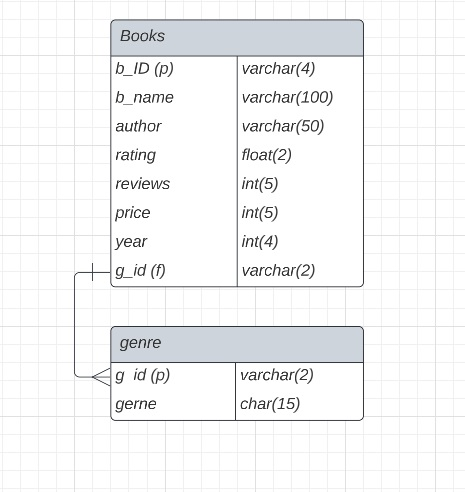

In [13]:
# Designing and creating database & tables  
# get the image
Image(filename='C:\work\ETL\dataetl.jpg',width=300, height=400)

In [15]:
# create a cursor and Print the databases (list of databses)
mycursor = mydb.cursor()

# Teh Cursor of the mysql-connector Python module is used to execute statements to communicate with the MySQL database.

mycursor.execute("show databases")
myresult = mycursor.fetchall()

for x in myresult:
    print(x)

('information_schema',)
('mysql',)
('performance_schema',)
('sakila',)
('sys',)
('topbooks',)
('world',)


In [16]:
# create a database

mycursor.execute("CREATE DATABASE topbooks")

#cross check werther database is created or not :-

mycursor = mydb.cursor()
mycursor.execute("show databases")
myresult = mycursor.fetchall()

for x in myresult:
    print(x)

In [16]:
#select database to work in
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="abhayjr11",
    database="topbooks"
)

mycursor = mydb.cursor()

In [43]:
# Create table genre

mycursor.execute("""CREATE TABLE genre (gr_id int PRIMARY KEY, gr_name VARCHAR(20))""")

In [50]:
# Create table books

mycursor.execute("""CREATE TABLE books (b_id int AUTO_INCREMENT PRIMARY KEY,b_name VARCHAR(200) NOT NULL ,
                 author VARCHAR(50),rating float(2) NOT NULL,reviews int(9),
                 price int(9),year int(4), g_id int(2))""")

#forign key added manually 

### Load

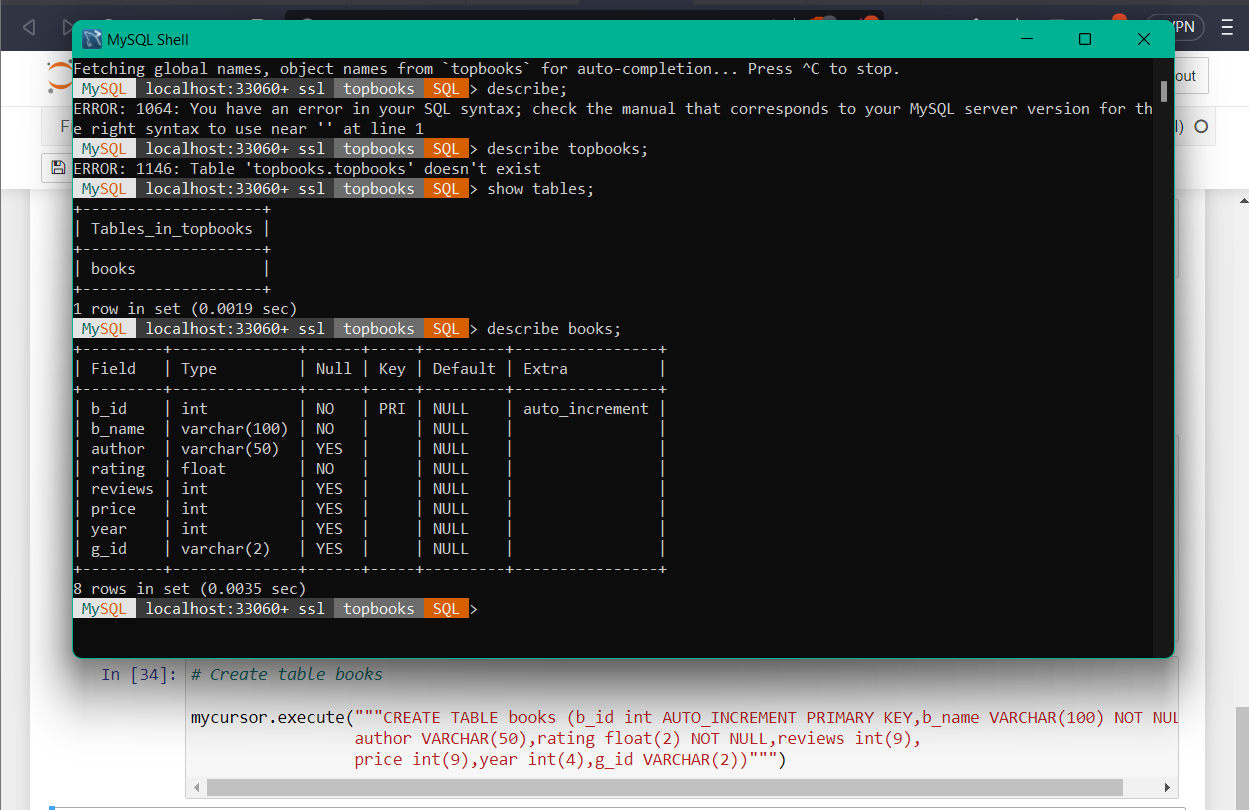

In [101]:
#table is created
Image(filename='C:\work\ETL\Scre.png',width=500, height=400)

In [19]:
data['Genre'].unique()

TypeError: list indices must be integers or slices, not str

In [141]:
# inster data into table genre
d1=tuple([1,'Non Fiction'])
d2=tuple([2,'Fiction'])
sql = "INSERT INTO topbooks.genre( gr_id, gr_name) VALUES(%s,%s)"
mycursor.execute(sql, d1)
mycursor.execute(sql, d2)
mydb.commit()

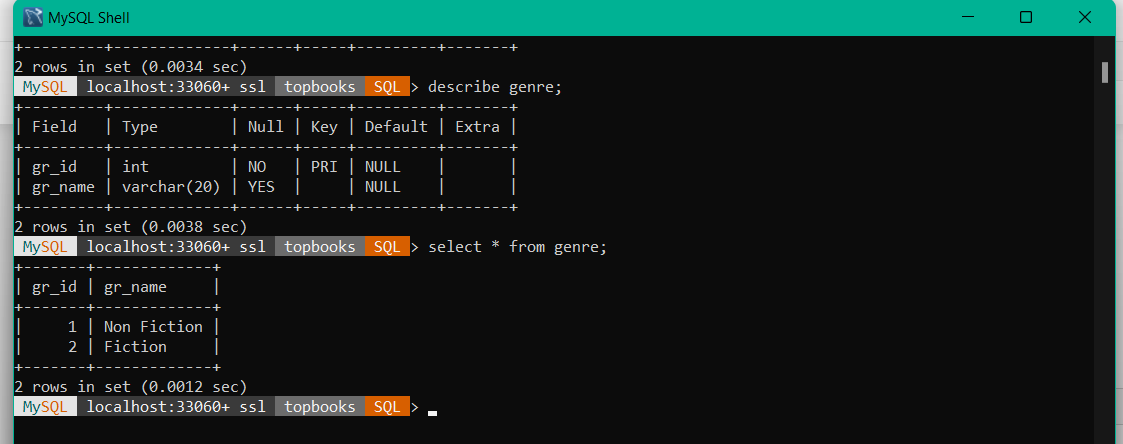

In [142]:
Image(filename='C:\work\ETL\Scr.png',width=500, height=400)

In [17]:
#inserting data into table group 
with open('C:\\work\\ETL\\books.csv','r',encoding="utf-8",errors="ignore") as file:
    data=file.readlines()
    for row in data:
        list=row.split(",")
        #print(list[6])
        if list[6]=='Genre\n':
            continue
        if list[6]=='Fiction\n':
            gid=2
        else:
            gid=1        
        top=tuple([list[0],list[1],list[2],list[3],list[4],list[5],gid])
        print(top)
        sql = "INSERT INTO topbooks.books( b_name,author,rating,reviews,price,year,g_id) VALUES(%s,%s,%s,%s,%s,%s,%s)"
        mycursor.execute(sql, top)
        mydb.commit()

('Act Like a Lady. Think Like a Man: What Men Really Think About Love. Relationships. Intimacy. and Commitment', 'Steve Harvey', '4.6', '5013', '17', '2009', 1)
('Arguing with Idiots: How to Stop Small Minds and Big Government', 'Glenn Beck', '4.6', '798', '5', '2009', 1)
('Breaking Dawn (The Twilight Saga. Book 4)', 'Stephenie Meyer', '4.6', '9769', '13', '2009', 2)
('Crazy Love: Overwhelmed by a Relentless God', 'Francis Chan', '4.7', '1542', '14', '2009', 1)
('Dead And Gone: A Sookie Stackhouse Novel (Sookie Stackhouse/True Blood)', 'Charlaine Harris', '4.6', '1541', '4', '2009', 2)
('Diary of a Wimpy Kid: The Last Straw (Book 3)', 'Jeff Kinney', '4.8', '3837', '15', '2009', 2)
('Divine Soul Mind Body Healing and Transmission System: The Divine Way to Heal You. Humanity. Mother Earth. and All…', 'Zhi Gang Sha', '4.6', '37', '6', '2009', 1)
('Dog Days (Diary of a Wimpy Kid. Book 4) (Volume 4)', 'Jeff Kinney', '4.8', '3181', '12', '2009', 2)
('Eat This Not That! Supermarket Survival G

('Teach Like a Champion: 49 Techniques that Put Students on the Path to College', 'Doug Lemov', '4.4', '637', '20', '2011', 1)
("The 17 Day Diet: A Doctor's Plan Designed for Rapid Results", 'Mike Moreno', '4.3', '2314', '22', '2011', 1)
('The 4 Hour Body: An Uncommon Guide to Rapid Fat Loss. Incredible Sex and Becoming Superhuman', 'Timothy Ferriss', '4.3', '4587', '21', '2011', 1)
('The 5 Love Languages: The Secret to Love That Lasts', 'Gary Chapman', '4.7', '3477', '28', '2011', 1)
('The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change', 'Stephen R. Covey', '4.6', '9325', '24', '2011', 1)
('The Art of Racing in the Rain: A Novel', 'Garth Stein', '4.7', '11813', '10', '2011', 2)
('The China Study: The Most Comprehensive Study of Nutrition Ever Conducted And the Startling Implications for Diet…', 'Thomas Campbell', '4.7', '4633', '21', '2011', 1)
('The Dukan Diet: 2 Steps to Lose the Weight. 2 Steps to Keep It Off Forever', 'Pierre Dukan', '4.1', '2023', '15', 

("Quiet: The Power of Introverts in a World That Can't Stop Talking", 'Susan Cain', '4.6', '10009', '7', '2013', 1)
('Rush Revere and the Brave Pilgrims: Time-Travel Adventures with Exceptional Americans (1)', 'Rush Limbaugh', '4.9', '7150', '12', '2013', 2)
('Shred: The Revolutionary Diet: 6 Weeks 4 Inches 2 Sizes', 'Ian K. Smith M.D.', '4.1', '2272', '6', '2013', 1)
('Soul Healing Miracles: Ancient and New Sacred Wisdom. Knowledge. and Practical Techniques for Healing the Spiritual…', 'Zhi Gang Sha', '4.6', '220', '17', '2013', 1)
('StrengthsFinder 2.0', 'Gallup', '4', '5069', '17', '2013', 1)
('Sycamore Row (Jake Brigance)', 'John Grisham', '4.5', '23114', '18', '2013', 2)
('The 5 Love Languages: The Secret to Love That Lasts', 'Gary Chapman', '4.7', '3477', '28', '2013', 1)
('The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change', 'Stephen R. Covey', '4.6', '9325', '24', '2013', 1)
('The Book Thief', 'Markus Zusak', '4.6', '23148', '6', '2013', 2)
('The Day t

('Laugh-Out-Loud Jokes for Kids', 'Rob Elliott', '4.6', '6990', '4', '2015', 1)
('Love You Forever', 'Robert Munsch', '4.8', '18613', '5', '2015', 2)
('Mindset: The New Psychology of Success', 'Carol S. Dweck', '4.6', '5542', '10', '2015', 1)
("Oh. the Places You'll Go!", 'Dr. Seuss', '4.9', '21834', '8', '2015', 2)
('Old School (Diary of a Wimpy Kid #10)', 'Jeff Kinney', '4.8', '6169', '7', '2015', 2)
('Publication Manual of the American Psychological Association. 6th Edition', 'American Psychological Association', '4.5', '8580', '46', '2015', 1)
('Secret Garden: An Inky Treasure Hunt and Coloring Book (For Adults. mindfulness coloring)', 'Johanna Basford', '4.7', '9366', '9', '2015', 1)
('StrengthsFinder 2.0', 'Gallup', '4', '5069', '17', '2015', 1)
('The 5 Love Languages: The Secret to Love that Lasts', 'Gary Chapman', '4.8', '25554', '8', '2015', 1)
('The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change', 'Stephen R. Covey', '4.7', '4725', '16', '2015', 1)
(

('Publication Manual of the American Psychological Association. 6th Edition', 'American Psychological Association', '4.5', '8580', '46', '2017', 1)
('Puppy Birthday to You! (Paw Patrol) (Little Golden Book)', 'Golden Books', '4.8', '4757', '4', '2017', 2)
('Ready Player One: A Novel', 'Ernest Cline', '4.6', '22536', '12', '2017', 2)
('StrengthsFinder 2.0', 'Gallup', '4', '5069', '17', '2017', 1)
('The 5 Love Languages: The Secret to Love that Lasts', 'Gary Chapman', '4.8', '25554', '8', '2017', 1)
('The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change', 'Stephen R. Covey', '4.7', '4725', '16', '2017', 1)
('The Four Agreements: A Practical Guide to Personal Freedom (A Toltec Wisdom Book)', 'Don Miguel Ruiz', '4.7', '23308', '6', '2017', 1)
('The Getaway', 'Jeff Kinney', '4.8', '5836', '0', '2017', 2)
('The Going-To-Bed Book', 'Sandra Boynton', '4.8', '5249', '5', '2017', 2)
("The Handmaid's Tale", 'Margaret Atwood', '4.3', '29442', '7', '2017', 2)
('The Instant P

("Player's Handbook (Dungeons & Dragons)", 'Wizards RPG Team', '4.8', '16990', '27', '2019', 2)
('Salt. Fat. Acid. Heat: Mastering the Elements of Good Cooking', 'Samin Nosrat', '4.8', '7802', '20', '2019', 1)
('School Zone - Big Preschool Workbook - Ages 4 and Up. Colors. Shapes. Numbers 1-10. Alphabet. Pre-Writing. Pre-Reading…', 'School Zone', '4.8', '23047', '6', '2019', 1)
('Strange Planet (Strange Planet Series)', 'Nathan W. Pyle', '4.9', '9382', '6', '2019', 2)
('The 5 Love Languages: The Secret to Love that Lasts', 'Gary Chapman', '4.8', '25554', '8', '2019', 1)
('The Body Keeps the Score: Brain. Mind. and Body in the Healing of Trauma', 'Bessel van der Kolk M.D.', '4.8', '12361', '12', '2019', 1)
('The Complete Ketogenic Diet for Beginners: Your Essential Guide to Living the Keto Lifestyle', 'Amy Ramos', '4.3', '13061', '6', '2019', 1)
('The Four Agreements: A Practical Guide to Personal Freedom (A Toltec Wisdom Book)', 'Don Miguel Ruiz', '4.7', '23308', '6', '2019', 1)
('The 

DataError: 1406 (22001): Data too long for column 'reviews' at row 1

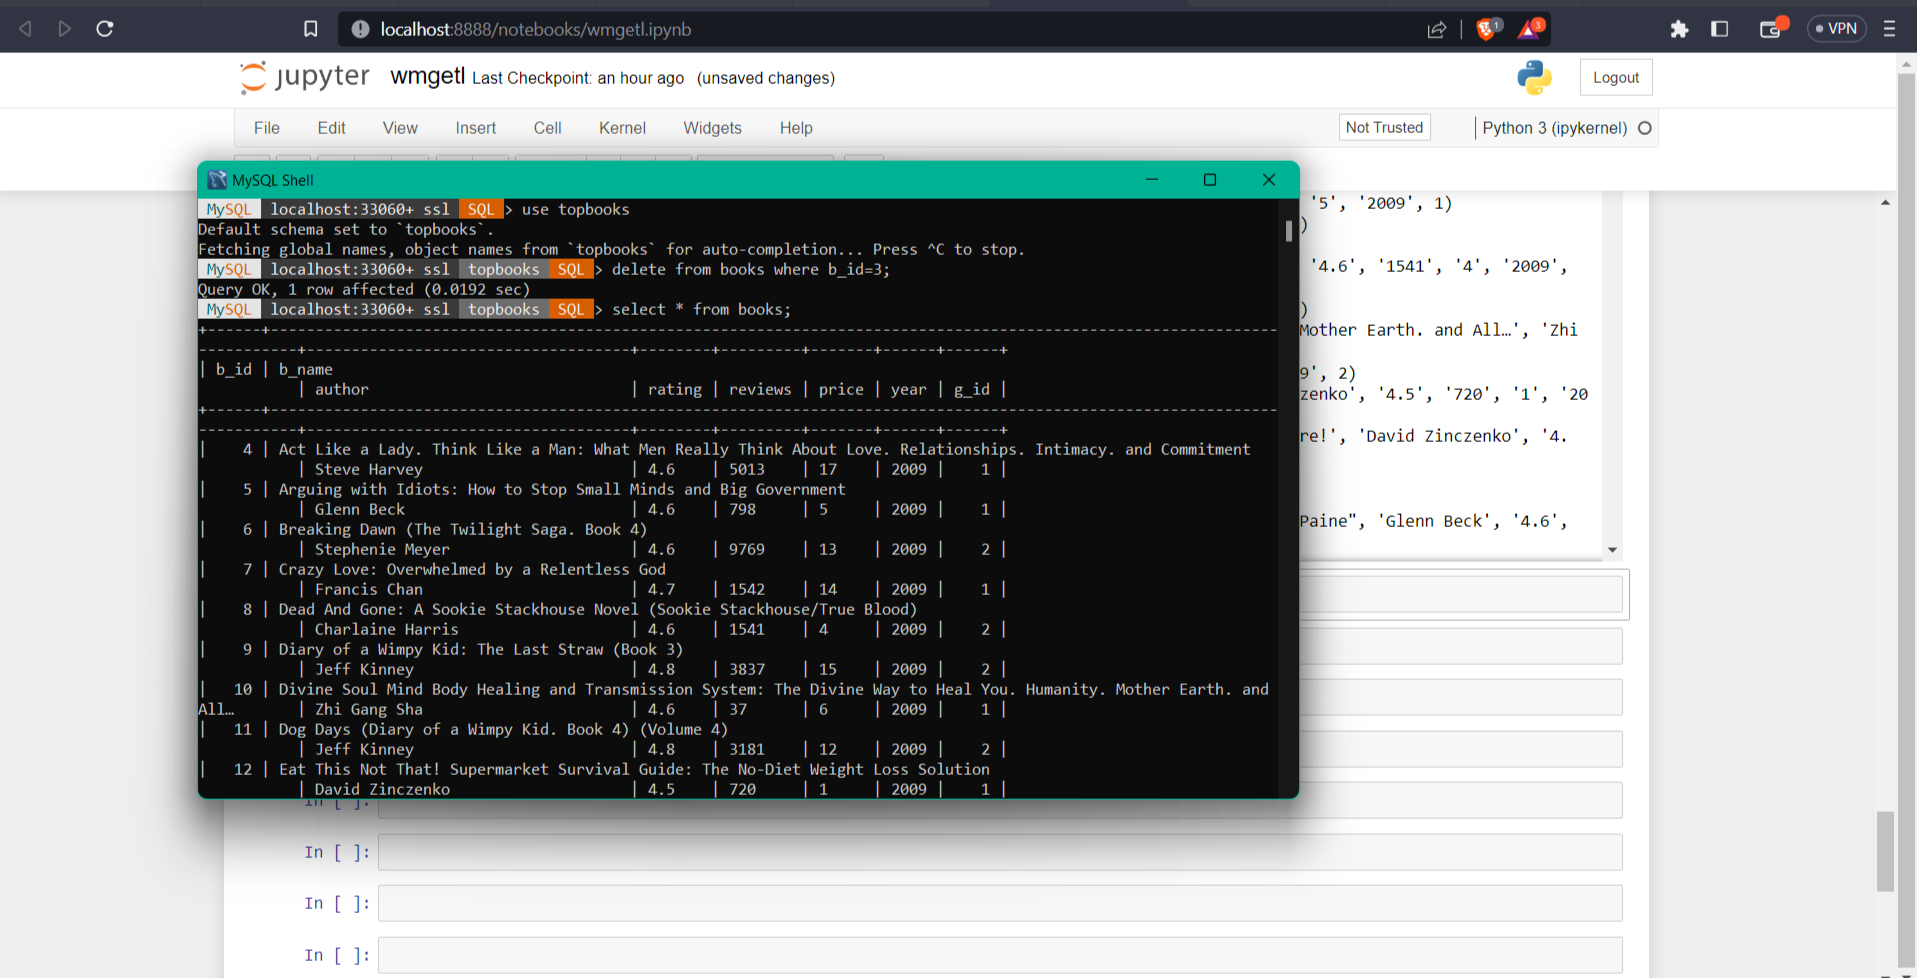

In [157]:
# records instered into books table
Image(filename='C:\work\ETL\Screen.png',width=500, height=400)

# Done